In [4]:
#############Building a ReLu 2 Layer neural network
import numpy as np
import matplotlib.pyplot as plt


In [29]:
#(c)

# Linear activation
def a(x,w,b):
    a_out = x.dot(w) + b
    return a_out

# Relu function
def relu(x):
    return max(0,x)

# Softmax function
def softmax(x):
    e = np.exp(x-np.max(x))
    if e.ndim == 1:
        return e / np.sum(e,axis=0)
    else:
        return e / np.array([np.sum(e,axis=1)]).T

#write output function
def ff_nn_2_ReLu(x,w1,w2,v,c,b1,b2):
    num_rows,num_columns = x.shape
    y = []
    
    for i in range(num_rows):
        x_i = x[i,:]
        
        # Linear activations into hidden units
        a11 = x_i[0]*w1[0,0] + x_i[1]*w1[1,0] + b1[0]
        a12 = x_i[0]*w1[0,1] + x_i[1]*w1[1,1] + b1[1]
        a13 = x_i[0]*w1[0,2] + x_i[1]*w1[1,2] + b1[2]
        
        # output of 1st hidden units
        h11 = relu(a11)
        h12 = relu(a12)
        h13 = relu(a13)
        
        #Linear activations into second hidden layer
        a21=h11*w2[0,0] + h12*w2[1,0] + h13*w2[2,0] + b2[0]
        a22=h11*w2[0,1] + h12*w2[1,1] + h13*w2[2,1] + b2[1]
        
        #output of 2nd hidden layer
        h21=relu(a21)
        h22=relu(a22)
        
        #Linear activations into output
        a31=h21*v[0,0] + h22*v[1,0] + c[0]
        a32=h21*v[0,1] + h22*v[1,1] + c[1]
        a33=h21*v[0,2] + h22*v[1,2] + c[2]
        
        # Output of network
        a=np.array([a31,a32,a33])
        y.append(softmax(a))

    return np.array(y)

In [30]:
##(d)

x = np.array([[1,-1],[0,-1],[0,1]])
w1 = np.array([[1,-1,0],[0,0,.5]])
w2 = np.array([[1,-1],[0,-1],[0,0]])
v = np.array([[1,0,-1],[1,0,-1]])
b1 = np.array([0,0,1])
b2 = np.array([1,-1])
c = np.array([1,0,0])

ff_nn_2_ReLu(x, w1, w2, v, c, b1, b2)

array([[0.94649912, 0.04712342, 0.00637746],
       [0.84379473, 0.1141952 , 0.04201007],
       [0.84379473, 0.1141952 , 0.04201007]])

In [1]:
#######Gradient Descent

##(b)

# --- Load Librarires ---
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

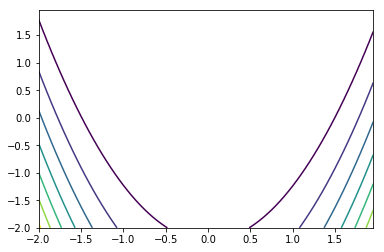

In [2]:
#In 2D plot
delta = 0.05
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y-X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
plt.show()

In [5]:
# --- Defining gradient ----
def grad_f(vector):
    x, y = vector
    df_dx = 400*(x**3) + 2*x - 400*x*y - 2
    df_dy = 200*y - 200*(x**2)
    return np.array([df_dx, df_dy])

# --- Grad Descent ----
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - learning_rate * grad
        trajectory.append(point)
    return np.array(trajectory)

/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


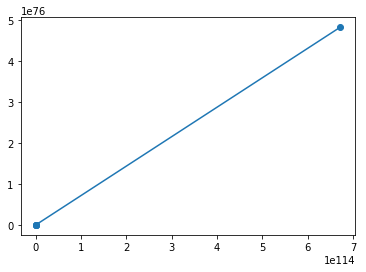

In [4]:
# --- When learning rate is 0.05
np.random.seed(10)
traj = grad_descent(iterations=100,learning_rate=0.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


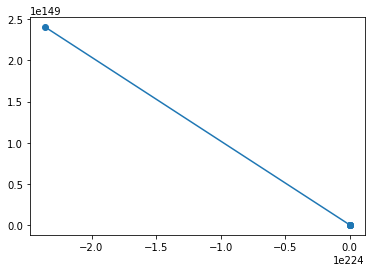

In [8]:
# --- When learning rate is 0.005
np.random.seed(10)
traj = grad_descent(iterations=100,learning_rate=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


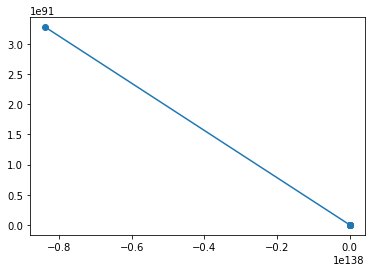

In [10]:
# --- When learning rate is 0.0001
np.random.seed(10)
traj = grad_descent(iterations=100,learning_rate=0.001)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [78]:
### (d)

# --- Gradient with momentum ---
def grad_descent_with_momentum(starting_point=None, iterations=10, 
                               alpha=.9, epsilon=10,
                              learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-10,10,size=2)
    trajectory = [point]
    grad = grad_f(point)
    dx = learning_rate*grad
    point = point - dx
    trajectory.append(point)
    
    for i in range(iterations):
        grad = grad_f(point)
        dx = learning_rate*grad
        point = point - dx
        trajectory.append(point)
    return np.array(trajectory)


/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """


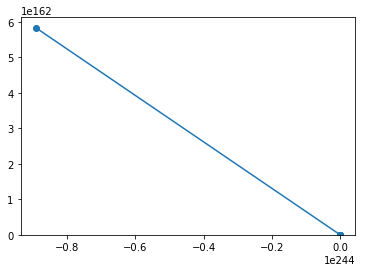

In [79]:
# --- Visualizing trajectory --

## When learning rate is 0.05
np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=[2,-1.9],iterations=50, epsilon=2, alpha=.5,
                                 learning_rate=0.05)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in double_scalars
  """
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


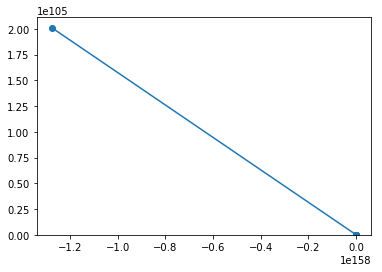

In [80]:
## When learning rate is 0.01
np.random.seed(10)
traj = grad_descent_with_momentum(iterations=50, epsilon=2, alpha=.5,
                                 learning_rate=0.01)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in double_scalars
  after removing the cwd from sys.path.


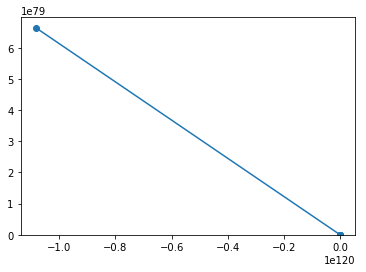

In [81]:
## When learning rate is 0.005
np.random.seed(10)
traj = grad_descent_with_momentum(starting_point=[2,-1.9],iterations=50, epsilon=2, alpha=.5,
                                 learning_rate=0.005)

fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
x= traj[:,0]
y= traj[:,1]
plt.plot(x,y,'-o')

In [11]:
###Backprop

###(b)

import numpy as np
from math import pi as Pi
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import random

In [54]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))

def relu(x):
    return np.maximum(x, 0)

def y_ex(w1, w2, v, b1, b2, c, x):
    a1 = x.dot(w1) + b1
    h1 = relu(a1)
    a2 = h1.dot(w2) + b2
    h2 = relu(a2)
    a3 = h2.dot(v) + c
    return softmax(a3)

def forward(parameters, x):
    W1, W2, V, b1, b2, c = parameters
    a1 = x.dot(w1) + b1
    h1 = relu(a1)
    a2 = h1.dot(w2) + b2
    h2 = relu(a2)
    a3 = h2.dot(V) + c
    y_hat = softmax(a3)
    return a1, h1, a2, h2, a3, y_hat
    
def loss(y, y_hat):
    tot = y * np.log(y_hat)
    return -tot.sum()

def grad_f(parameters, x, y):
    w1, w2, v, b1, b2, c = parameters
    a1, h1, a2, h2, a3, y_hat = forward(parameters, x)
    
    dw1 = x.T.dot(((y_hat - y).dot(v.T)*(h2 > 0)).dot(w2.T)*(h1 > 0))
    dw2 = h1.T.dot(((y_hat - y).dot(v.T)*(h2>0)))
    dv = h2.T.dot(y_hat - y)
    db1 = (((y_hat - y).dot(v.T)*(h2 > 0)).dot(w2.T)*(h1 > 0)).sum(axis=0)
    db2 = ((y_hat - y).dot(v.T)*(h2>0)).sum(axis=0)
    dc = (y_hat - y).sum(axis=0)
    
    return [dw1, dw2, dv, db1, db2, dc]

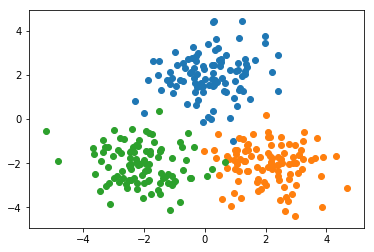

In [18]:
###(c) Bivariate Gaussian distributions with parameters
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

mu1=[0,2]
mu2=[2,-2]
mu3=[-2,-2]
sigma = np.array([[1,0],[0,1]])
n = 100

a = np.random.multivariate_normal(mean = mu1, cov = sigma, size = n)
b = np.random.multivariate_normal(mean = mu2, cov = sigma, size = n)
c = np.random.multivariate_normal(mean = mu3, cov = sigma, size = n)

plt.scatter(a[:,0], a[:,1])
plt.scatter(b[:,0], b[:,1])
plt.scatter(c[:,0], c[:,1])
plt.show()

In [71]:
###(d) Fit network using Gradient descent
def grad_descent(x, y, parameters, iterations=100, learning_rate=0.005):
    w1, w2, v, b1, b2, c = parameters
    point = parameters
    traj = [point]
    losses = [loss(y, y_ex(w1, w2, v, b1, b2, c, x))]
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        point = np.subtract(point, [learning_rate * i for i in grad])
        traj.append(point)
        losses.append(loss(y, forward(point, x)[5]))
    return (np.array(traj), losses)


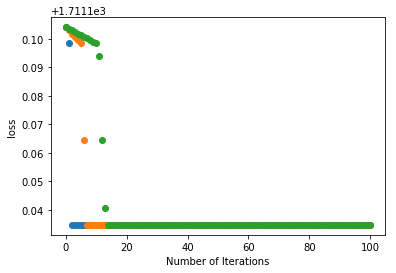

In [70]:
np.random.seed(123)
w1 = np.random.uniform(-.1,.1,size=6).reshape(2,3)
w2 = np.random.uniform(-.1,.1,size=6).reshape(3,2)
v = np.random.uniform(-.1,.1,size=6).reshape(2,3)
b1 = np.random.uniform(-.1,.1,size=3).reshape(1,3)
b2 = np.random.uniform(-.1,.1,size=2).reshape(1,2)
c = np.random.uniform(-.1,.1,size=3).reshape(1,3)

parameters = np.array([w1, w2, v, b1, b2, c])
traj, loss1 = grad_descent(X,Y,parameters,iterations=100,learning_rate=0.005)
traj, loss2 = grad_descent(X,Y,parameters,iterations=100,learning_rate=0.001)
traj, loss3 = grad_descent(X,Y,parameters,iterations=100,learning_rate=0.0005)

plt.plot(loss1,'o',label='learning rate is 0.005')
plt.plot(loss2,'o',label='learning rate is 0.001')
plt.plot(loss3,'o',label='learning rate is 0.0005')

plt.xlabel("Number of Iterations")
plt.ylabel("loss")
plt.show()

In [74]:
###(e) Fit network using momentum 
def momentum(x, y, parameters, iterations = 100, learning_rate = 0.005,
                          alpha = 0.8):
    w1, w2, v, b1, b2, c = parameters
    point = parameters
    traj = [point]
    losses = [loss(y, y_ex(w1, w2, v, b1, b2, c, x))]
    v = [np.zeros(np.shape(i)) for i in parameters]
    
    for i in range(iterations):
        grad = grad_f(parameters, x, y)
        v = np.add([learning_rate * i for i in v], [alpha * i for i in grad])
        point = point - v
        traj.append(point)
        losses.append(loss(y, forward(point, x)[5]))
    return (np.array(traj), losses)

/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/Users/aggrace/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


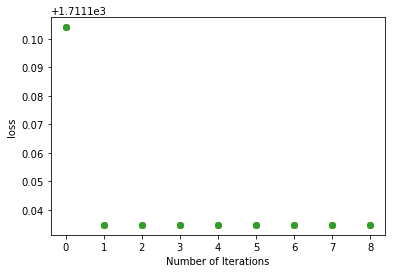

In [79]:
traj, loss4 = momentum(X,Y,parameters,iterations=100,learning_rate=0.005,alpha=0.8)
traj, loss5 = momentum(X,Y,parameters,iterations=100,learning_rate=0.001,alpha=0.8)
traj, loss6 = momentum(X,Y,parameters,iterations=100,learning_rate=0.0005,alpha=0.8)

plt.plot(loss4,'o',label='learning rate is 0.005')
plt.plot(loss5,'o',label='learning rate is 0.001')
plt.plot(loss6,'o',label='learning rate is 0.0005')

plt.xlabel("Number of Iterations")
plt.ylabel("loss")
plt.show()
